## Observations and Insights

## Dependencies and starter code

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_project = pd.merge(mouse_metadata,study_results)
mouse_project

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [27]:
Drug_Regimen = mouse_project["Drug Regimen"]
Mouse_ID = mouse_project["Mouse ID"]
Tumor_Volume = mouse_project["Tumor Volume (mm3)"]
Mouse_Project_Reduced = pd.DataFrame({"Mouse ID":Mouse_ID,"Drug Regimen": Drug_Regimen,"Tumor Volume (mm3)":Tumor_Volume})
Mouse_Project_Reduced.head()

Mouse ID Drug Regimen  Tumor Volume (mm3)
0     k403     Ramicane           45.000000
1     k403     Ramicane           38.825898
2     k403     Ramicane           35.014271
3     k403     Ramicane           34.223992
4     k403     Ramicane           32.997729

## Summary statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean = Mouse_Project_Reduced.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Median = Mouse_Project_Reduced.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variance = Mouse_Project_Reduced.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Standard_Deviation = Mouse_Project_Reduced.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = Mouse_Project_Reduced.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

Summary_Stats = pd.DataFrame({"Mean":Mean,"Median":Median,"Variance":Variance,"Standard Deviation":Standard_Deviation,"SEM":SEM})
Summary_Stats


Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar plots

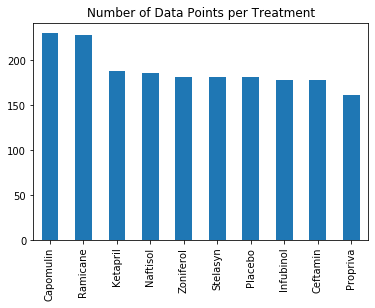

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
number_treatments = mouse_project["Drug Regimen"].value_counts()
number_treatments.plot(kind="bar",figsize = (6,4))
plt.title("Number of Data Points per Treatment")
plt.show()
plt.tight_layout

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

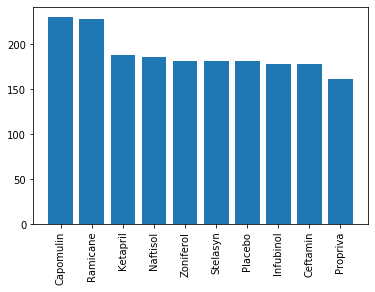

In [30]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
number_treatments_2 = mouse_project["Drug Regimen"].value_counts()
plt.bar(number_treatments_2.index.values,number_treatments_2.values)
plt.xticks(rotation=90)

## Pie plots

<function matplotlib.pyplot.show(*args, **kw)>

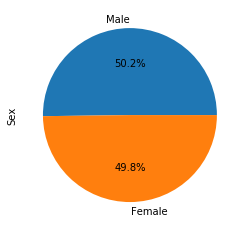

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_metadata.Sex.value_counts()
mouse_sex.plot(kind="pie",autopct="%1.1f%%")
plt.show

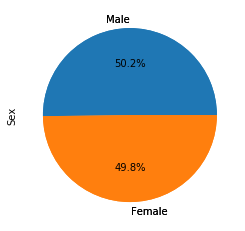

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex.values,labels=mouse_sex.index.values)
mouse_sex.plot(kind="pie",autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_four = mouse_project.groupby(["Mouse ID"]).max()
top_four = top_four.reset_index()
merged_data = top_four[["Mouse ID","Timepoint"]].merge(mouse_project,on=["Mouse ID","Timepoint"],how="left")

Drug_One = merged_data.loc[merged_data["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
Drug_Two = merged_data.loc[merged_data["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
Drug_Three = merged_data.loc[merged_data["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
Drug_Four = merged_data.loc[merged_data["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]


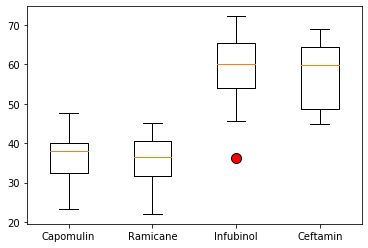

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
color = dict(markerfacecolor = "red",markersize = 10)
plt.boxplot([Drug_One,Drug_Two,Drug_Three,Drug_Four],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=color)
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume for Mouse Treated with Capomulin')

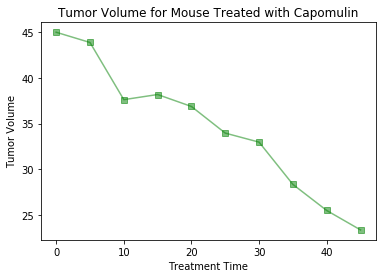

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_filter = mouse_project["Drug Regimen"]=="Capomulin"
choice = mouse_project[capomulin_filter]

filter_b = choice["Mouse ID"]=="s185"
choice_b = choice[filter_b]

x_axis = choice_b["Timepoint"] 
tumor_volume_mouse = choice_b["Tumor Volume (mm3)"]

line = plt.plot(x_axis, tumor_volume_mouse, marker="s", color = "green", alpha= 0.5,)
plt.xlabel("Treatment Time")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume for Mouse Treated with Capomulin")

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mouse_project["Weight (g)"]
average_tumor = mouse_project["Tumor Volume (mm3)"]

filter_volume = mouse_project["Tumor Volume (mm3)"]=="Capomulin"
choice_2 = mouse_project[filter_volume]

x_axis2 = filter_volume
data2 = choice_2

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.5)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin regimen")

NameError: name 'data' is not defined

In [57]:
capomulin_only = merged_data.loc[[merged_data["Drug Regimen"]=="Capomulin"]

SyntaxError: unexpected EOF while parsing (<ipython-input-57-8fa9d9385740>, line 1)

In [55]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capomulin_average = choice_2
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



ValueError: x and y must have length at least 2.